# Applications of MLP

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import category_encoders as ce

In [ ]:
tf.__version__

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [5]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [17]:
encoder=ce.OneHotEncoder(cols=['gender','smoking_history'],handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
dataset_encoded = encoder.fit_transform(dataset)
print(dataset_encoded)

       gender_Female  gender_Male  gender_Other   age  hypertension  \
0                1.0          0.0           0.0  80.0             0   
1                1.0          0.0           0.0  54.0             0   
2                0.0          1.0           0.0  28.0             0   
3                1.0          0.0           0.0  36.0             0   
4                0.0          1.0           0.0  76.0             1   
...              ...          ...           ...   ...           ...   
99995            1.0          0.0           0.0  80.0             0   
99996            1.0          0.0           0.0   2.0             0   
99997            0.0          1.0           0.0  66.0             0   
99998            1.0          0.0           0.0  24.0             0   
99999            1.0          0.0           0.0  57.0             0   

       heart_disease  smoking_history_never  smoking_history_No Info  \
0                  1                    1.0                      0.0   
1  

In [27]:
X = dataset_encoded.iloc[:, 0:-1].values
y = dataset_encoded.iloc[:, -1].values

In [28]:
pd.DataFrame(X, columns = ["gender_Female","gender_Male","gender_Other","age","hypertension","heart_disease","smoking_history_never","smoking_history_No Info","smoking_history_current","smoking_history_former","smoking_history_ever","smoking_history_not current","bmi","HbA1c_level","blood_glucose_level"])

,gender_Female,gender_Male,gender_Other,age,hypertension,heart_disease,smoking_history_never,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not current,bmi,HbA1c_level,blood_glucose_level
0,1.0,0.0,0.0,80.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,25.19,6.6,140.0
1,1.0,0.0,0.0,54.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.32,6.6,80.0
2,0.0,1.0,0.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.32,5.7,158.0
3,1.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.45,5.0,155.0
4,0.0,1.0,0.0,76.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.14,4.8,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.32,6.2,90.0
99996,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.37,6.5,100.0
99997,0.0,1.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.83,5.7,155.0
99998,1.0,0.0,0.0,24.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.42,4.0,100.0


In [29]:
pd.DataFrame(y, columns = ["diabetes"])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [30]:
X

array([[  1.  ,   0.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  1.  ,   0.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  0.  ,   1.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  1.  ,   0.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  1.  ,   0.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [31]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

### Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [34]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer


In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [37]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [38]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [39]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1635 - accuracy: 0.9448
Epoch 2/100
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9592
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1137 - accuracy: 0.9598
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1129 - accuracy: 0.9604
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1124 - accuracy: 0.9603
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1118 - accuracy: 0.9607
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1115 - accuracy: 0.9604
Epoch 8/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1110 - accuracy: 0.9607
Epoch 9/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1108 - accuracy: 0.9609
Epoch 10/100
2500/2500 [==============================] - 5s 2ms/step - l

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [40]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 1s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy_score(y_test, y_pred)

[[18230    67]
 [  555  1148]]


0.9689

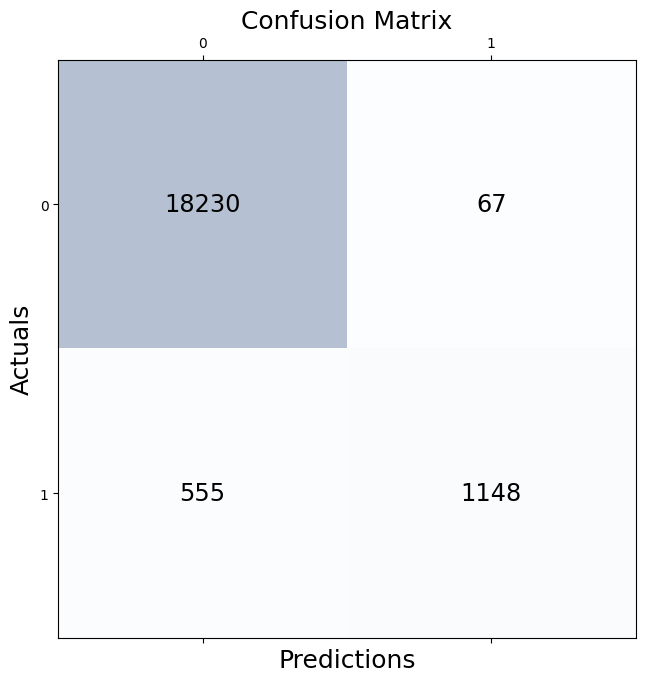

In [42]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Homework**
- Use the dataset: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset.
- Experiment with the number of hidden layers, and the number of units in the hidden layer.
- Try to experiment on the activation functions in the hidden layer https://www.tensorflow.org/api_docs/python/tf/keras/activations
- Try to experiment with the optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Check the accuracy, specificity, and sensitivity of your model.